#Table of Contents
* [Create & Test Reflectance/Transmittance Functions](#Create-&-Test-Reflectance/Transmittance-Functions)
	* [Define functions](#Define-functions)
	* [Test functions](#Test-functions)
* [Given list of refractive indices that represent a set of layers, create function to calculate the propagation angle in any of the layers](#Given-list-of-refractive-indices-that-represent-a-set-of-layers,-create-function-to-calculate-the-propagation-angle-in-any-of-the-layers)
* [Function to calculate power in direction of a ray in a specified layer in a stack](#Function-to-calculate-power-in-direction-of-a-ray-in-a-specified-layer-in-a-stack)
	* [Test at normal incidence](#Test-at-normal-incidence)
	* [Test at oblique incidence](#Test-at-oblique-incidence)


In [165]:
%%javascript
IPython.load_extensions('calico-document-tools');

<IPython.core.display.Javascript object>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
from IPython.display import Image
from __future__ import division
from __future__ import print_function

degtorad = np.pi/180.

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days


#Create & Test Reflectance/Transmittance Functions 

##Define functions 

In [56]:
# Angle units are assumed to be in radians

def cos_angle2(angle1, n1, n2): # From Snell's law
    return np.sqrt(1 - (np.sin(angle1)*n1/n2)**2)

def reflectance_TE(angle1, n1, n2):
    c1 = np.cos(angle1)
    c2 = cos_angle2(angle1, n1, n2)
    temp = (n1*c1 - n2*c2) / (n1*c1 + n2*c2)
    return temp**2

def transmittance_TE(angle1, n1, n2):
    return 1.0 - reflectance_TE(angle1, n1, n2)

def reflectance_TM(angle1, n1, n2):
    c1 = np.cos(angle1)
    c2 = cos_angle2(angle1, n1, n2)
    temp = (n1*c2 - n2*c1) / (n1*c2 + n2*c1)
    return temp**2

def transmittance_TM(angle1, n1, n2):
    return 1.0 - reflectance_TM(angle1, n1, n2)

def reflectance_Unpol(angle1, n1, n2):
    rTE = reflectance_TE(angle1, n1, n2)
    rTM = reflectance_TM(angle1, n1, n2)
    return 0.5 * (rTE + rTM)

def transmittance_Unpol(angle1, n1, n2):
    return 1.0 - reflectance_Unpol(angle1, n1, n2)

##Test functions 

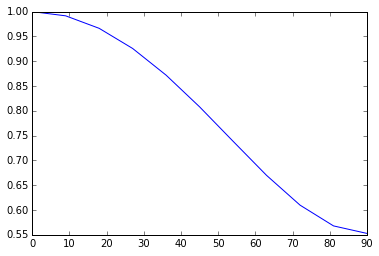

In [51]:
temp_angle1 = np.linspace(0.0, 90.0, 11)
plt.plot( temp_angle1, cos_angle2(temp_angle1*degtorad, 1.0, 1.2) )

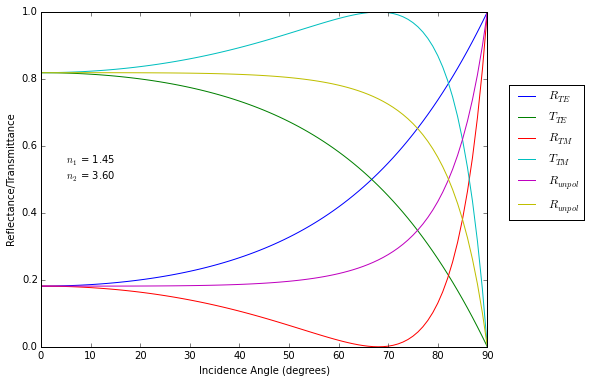

In [148]:
temp_angle1 = np.linspace(0.0, 90.0, 91)
n1 = 1.45
n2 = 3.6
fig, ax = plt.subplots(figsize=(8,6))
ax.plot( temp_angle1, reflectance_TE(temp_angle1*degtorad, n1, n2), label='$R_{TE}$' )
ax.plot( temp_angle1, transmittance_TE(temp_angle1*degtorad, n1, n2), label='$T_{TE}$' )
ax.plot( temp_angle1, reflectance_TM(temp_angle1*degtorad, n1, n2), label='$R_{TM}$' )
ax.plot( temp_angle1, transmittance_TM(temp_angle1*degtorad, n1, n2), label='$T_{TM}$' )
ax.plot( temp_angle1, reflectance_Unpol(temp_angle1*degtorad, n1, n2), label='$R_{unpol}$' )
ax.plot( temp_angle1, transmittance_Unpol(temp_angle1*degtorad, n1, n2), label='$R_{unpol}$' )
ax.legend(bbox_to_anchor=(1.23, 0.8))
ax.text(5,0.5,'$n_1$ = %.2f\n$n_2$ = %.2f' % (n1,n2))
ax.set_xlabel('Incidence Angle (degrees)')
ax.set_ylabel('Reflectance/Transmittance')

In [57]:
brewsterangle = np.arctan2(n2, n1)
print(n1, n2, brewsterangle/degtorad, 'deg')
print(reflectance_TM(brewsterangle, n1, n2), transmittance_TM(brewsterangle, n1, n2))

1.0 1.5 56.309932474 deg
0.0 1.0


#Given list of refractive indices that represent a set of layers, create function to calculate the propagation angle in any of the layers

In [85]:
# Given a list of refractive indices, calculate the incidence angle at any given 
# interface between materials. Incidence medium is layer 0, exit medium is layer
# len(refr_indices). All angles are in radians.

refr_indices = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]

def maxindex(a):
    return len(a) - 1

def incidence_angle_in_layer_i(i, angle0, refr_indices):
    if i > maxindex(refr_indices):
        print('INDEX OUT OF RANGE in function incidence_angle_in_layer_i')
        return
    elif i == 0:
        return angle0
    else:
        return np.arcsin( np.sin(angle0) * refr_indices[0] / refr_indices[i] )

for i in range(0,len(refr_indices)):
    print(i, incidence_angle_in_layer_i(i, 50.0*degtorad, refr_indices)/degtorad)

0 50.0
1 30.7102207661
2 22.5210121181
3 17.8434811283
4 14.7942155106
5 12.6426619919
6 11.0409840419


In [73]:
print(np.arcsin(np.sin(50.0*degtorad) * 1.0 / 1.5)/degtorad)

30.7102207661


#Function to calculate power in direction of a ray in a specified layer in a stack 

In [155]:
def power_in_specified_direction(angle0, refr_indices, layerindex):
    if layerindex > maxindex(refr_indices):
        print('LAYERINDEX OUT OF RANGE in function power_in_specified_direction')
        return
    temp = 1.0
    for i in range(1,layerindex+1):
        angle = incidence_angle_in_layer_i(i, angle0, refr_indices)
        temp *= transmittance_Unpol(angle, refr_indices[i-1], refr_indices[i])
    return temp

##Test at normal incidence 

In [160]:
angle0 = 0.0
for i in range(1,len(refr_indices)):
    angle = incidence_angle_in_layer_i(i, angle0*degtorad, refr_indices)
    print(i, refr_indices[i], angle/degtorad, 
          transmittance_Unpol(angle, refr_indices[i-1], refr_indices[i]), 
          power_in_specified_direction(angle0*degtorad, refr_indices, i))

1 1.5 0.0 0.96 0.96
2 2.0 0.0 0.979591836735 0.940408163265
3 2.5 0.0 0.987654320988 0.928798185941
4 3.0 0.0 0.99173553719 0.921122167875
5 3.5 0.0 0.994082840237 0.915671740847
6 4.0 0.0 0.995555555556 0.911602088665


In [151]:
print(0.96 * 0.979591836735)

0.940408163266


In [152]:
n1 = 3.5
n2 = 4.
print( 1.0 - ((n1-n2)/(n1+n2))**2 )

0.995555555556


In [153]:
print(1.0 * 0.96 * 0.979591836735 * 0.987654320988 * 0.99173553719 * 0.994082840237)

0.915671740847


##Test at oblique incidence 

In [162]:
angle0 = 88.0
for i in range(1,len(refr_indices)):
    angle = incidence_angle_in_layer_i(i, angle0*degtorad, refr_indices)
    print(i, refr_indices[i], angle/degtorad, 
          transmittance_Unpol(angle, refr_indices[i-1], refr_indices[i]), 
          power_in_specified_direction(angle0*degtorad, refr_indices, i))

1 1.5 41.7791042687 0.952918658155 0.952918658155
2 2.0 29.9798507651 0.97853066309 0.932460126436
3 2.5 23.5629464258 0.987393631132 0.920705190127
4 3.0 19.4588810158 0.991650843665 0.913018078556
5 3.5 16.5911438044 0.994049771163 0.907585412056
6 4.0 14.4685004425 0.995540836183 0.903538340026


In [164]:
print(1.0 * 0.952918658155 * 0.97853066309 * 0.987393631132 * 0.991650843665 * 0.994049771163 * 0.995540836183)

0.903538340026
